### Solar Data EDA Project 

##### import the important libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
sns.set(style="whitegrid")
%matplotlib inline

In [12]:
benin = pd.read_csv("C:/Users/27638\Downloads/data (1)/data/benin-malanville.csv")
sierra = pd.read_csv("C:/Users/27638/Downloads/data (1)\data/sierraleone-bumbuna.csv")
togo = pd.read_csv("C:/Users/27638/Downloads/data (1)/data/togo-dapaong_qc.csv")


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\27638\AppData\Local\Temp\ipykernel_26428\1243413557.py:1: SyntaxWarning: invalid escape sequence '\D'
  benin = pd.read_csv("C:/Users/27638\Downloads/data (1)/data/benin-malanville.csv")
C:\Users\27638\AppData\Local\Temp\ipykernel_26428\1243413557.py:2: SyntaxWarning: invalid escape sequence '\d'
  sierra = pd.read_csv("C:/Users/27638/Downloads/data (1)\data/sierraleone-bumbuna.csv")


In [14]:
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

In [16]:
#### merge the data 
df = pd.concat([benin, sierra, togo], ignore_index=True)

### Exploratory Data Analysis (EDA) 

In [19]:
df.shape

(1576800, 20)

In [25]:
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments', 'Country'],
      dtype='object')

In [27]:
## statistics summary 
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                GHI           DNI           DHI          ModA          ModB  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.243573e+02  1.449408e+02  1.151746e+02  2.231257e+02  2.155223e+02   
std    3.181073e+02  2.453781e+02  1.580602e+02  3.154732e+02  3.049439e+02   
min   -1.950000e+01 -7.800000e+00 -1.790000e+01  0.000000e+00  0.000000e+00   
25%   -2.200000e+00 -2.000000e-01 -1.400000e+00  0.000000e+00  0.000000e+00   
50%    1.200000e+00  0.000000e+00  1.400000e+00  4.100000e+00  4.000000e+00   
75%    4.244000e+02  2.270000e+02  2.190000e+02  4.111000e+02  3.973000e+02   
max    1.499000e+03  1.004500e+03  8.920000e+02  1.507000e+03  1.473000e+03   

               Tamb            RH            WS        WSgust       WSstdev  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.741696e+01  6.298333e+01  1.878440e+00  2.576763e+00  4.649840e-01   
std    5.131024e+00  2.854366e+

In [29]:
## missing values and fill the null missing value using mean
print("\nMissing Values (>5%):")
missing = df.isna().mean() * 100
print(missing[missing > 5])


Missing Values (>5%):
Comments    100.0
dtype: float64


In [31]:
## clean some selected columns and imputed with median 
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df[key_cols] = df[key_cols].fillna(df[key_cols].median())

In [33]:
df.shape

(1576800, 20)

In [35]:
## outliers detection using z-score technique
z_scores = np.abs(stats.zscore(df[key_cols]))
df = df[(z_scores < 3).all(axis=1)]

In [37]:
### save the cleaned data 
df.to_csv('solar_data_cleaned.csv', index=False)

##### Time Series analysis

In [44]:
dfs = pd.read_csv('solar_data_cleaned.csv')

In [46]:
dfs.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


C:\Users\27638\AppData\Local\Temp\ipykernel_26428\3176369400.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\27638\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


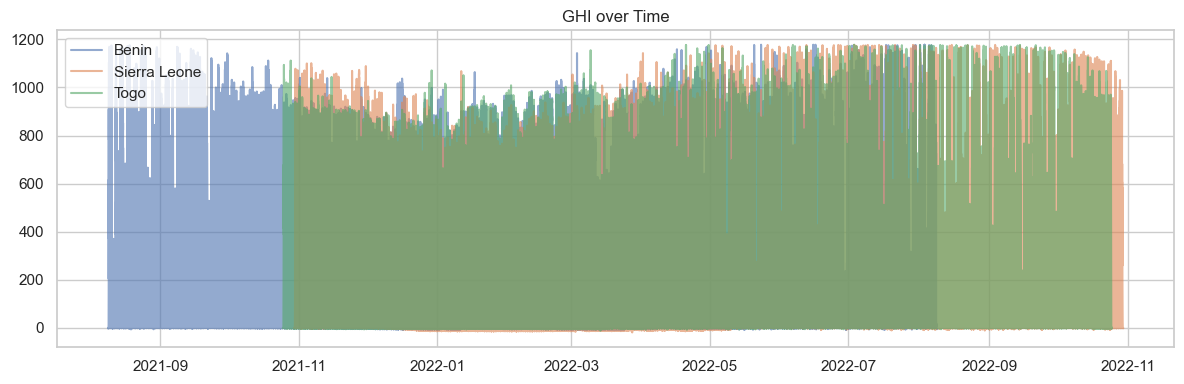

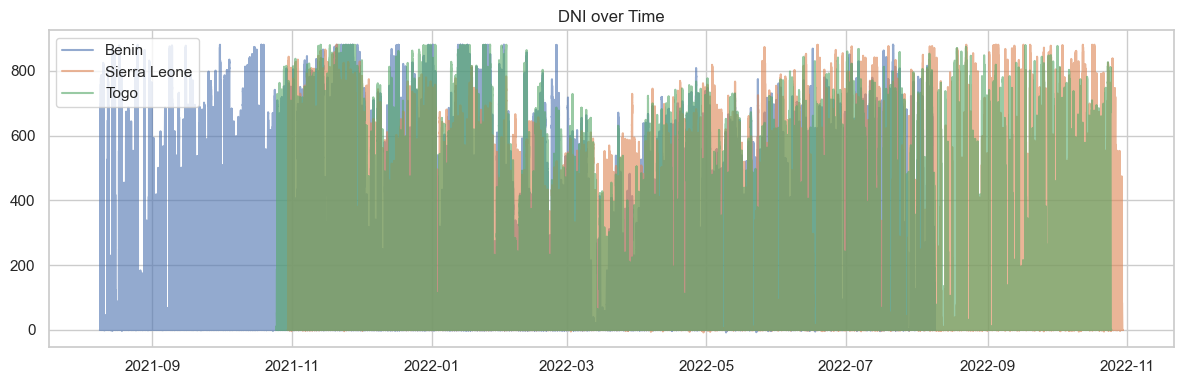

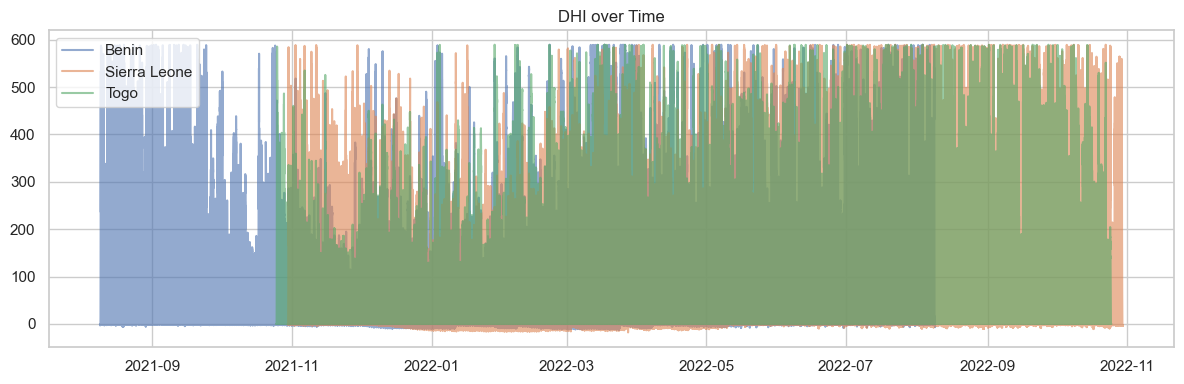

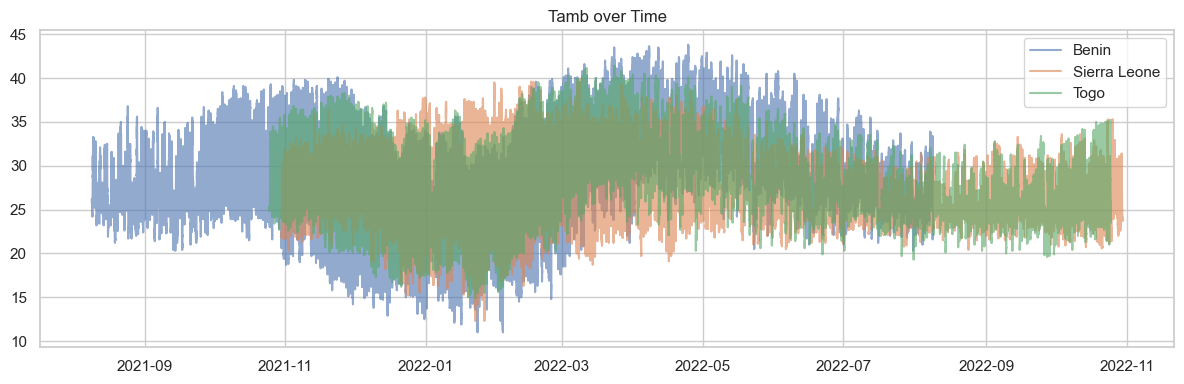

In [48]:
dfs['Timestamp'] = pd.to_datetime(dfs['Timestamp'])
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.figure(figsize=(12, 4))
    for country in dfs['Country'].unique():
        subset = dfs[dfs['Country'] == country]
        plt.plot(subset['Timestamp'], subset[col], label=country, alpha=0.6)
    plt.title(f'{col} over Time')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [50]:
## Cleaning Impact: Pre/post average ModA & ModB
dfs['Cleaning'] = dfs['Cleaning'].fillna(0)
cleaning_group = dfs.groupby(['Country', 'Cleaning'])[['ModA', 'ModB']].mean().unstack()
print("\nAverage ModA & ModB (Pre vs Post Cleaning):")
print(cleaning_group)


Average ModA & ModB (Pre vs Post Cleaning):
                    ModA                    ModB            
Cleaning               0           1           0           1
Country                                                     
Benin         228.491896  306.241962  221.314980  301.371190
Sierra Leone  200.978122  273.309252  192.561462  277.231102
Togo          217.123345  521.746067  210.826526  520.509363


In [52]:
cleaning_group.shape

(3, 4)

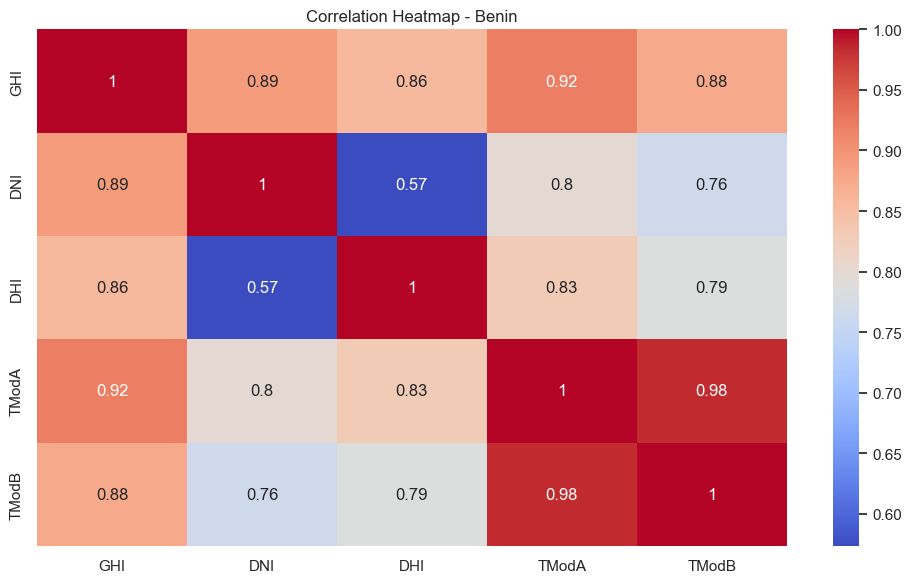

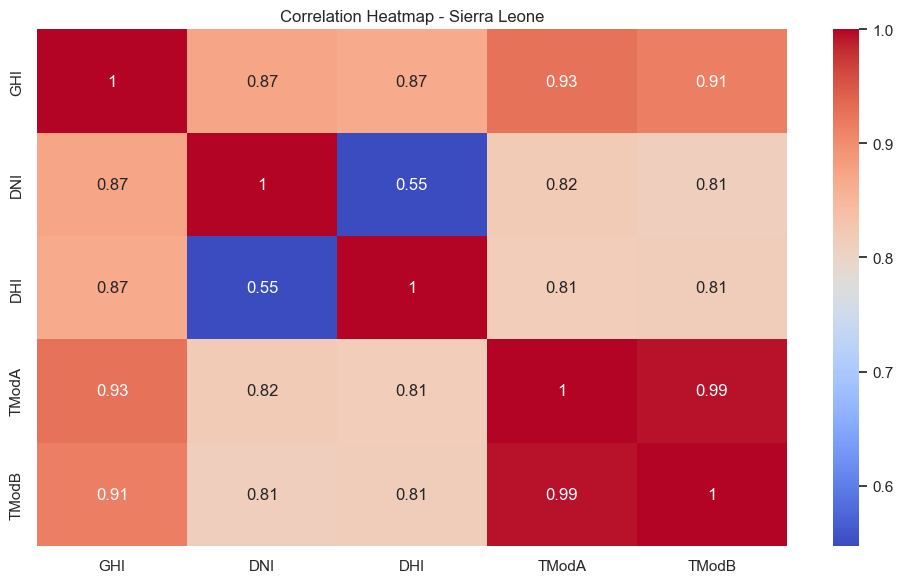

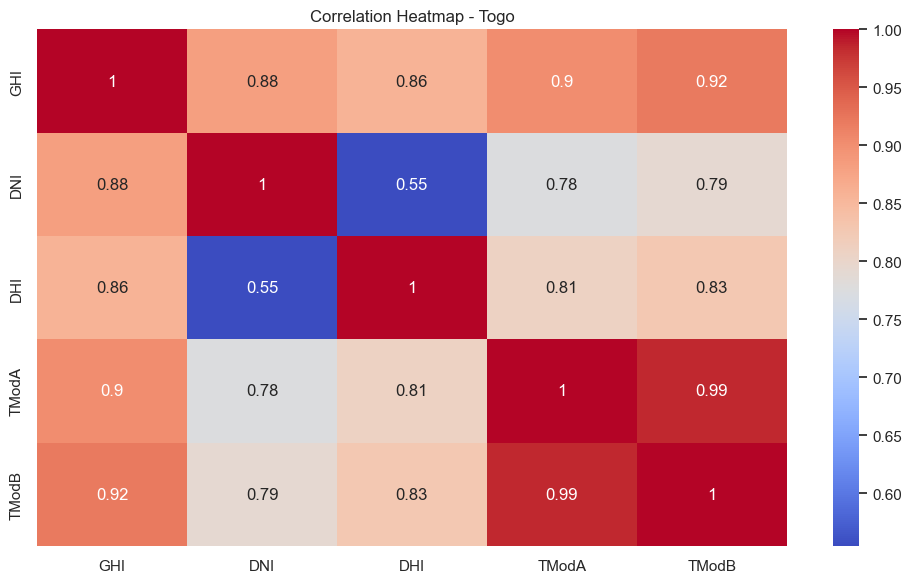

In [54]:
## heatmap correlation matrics plot 
for country in dfs['Country'].unique():
    plt.figure(figsize=(10, 6))
    corr = dfs[dfs['Country'] == country][['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap - {country}')
    plt.tight_layout()
    plt.show()

C:\Users\27638\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


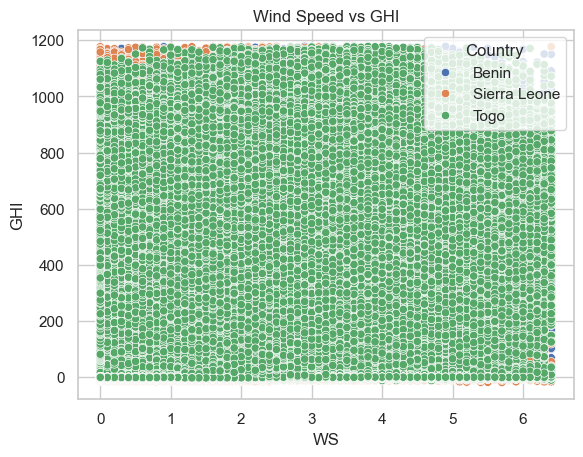

C:\Users\27638\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


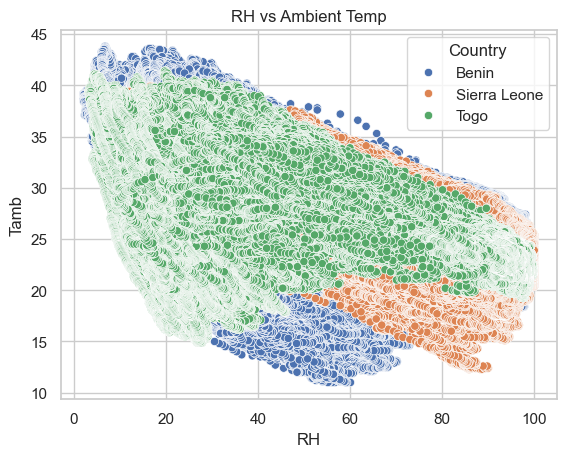

In [56]:
### Scatter Plots of  Wind & RH Relationships from the data
sns.scatterplot(data=dfs, x='WS', y='GHI', hue='Country')
plt.title("Wind Speed vs GHI")
plt.show()

sns.scatterplot(data=dfs, x='RH', y='Tamb', hue='Country')
plt.title("RH vs Ambient Temp")
plt.show()

C:\Users\27638\AppData\Local\Temp\ipykernel_26428\1750717334.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_dir = dfs.groupby(['WD_bin', 'Country'])['WS'].mean().unstack()


<Figure size 600x600 with 0 Axes>

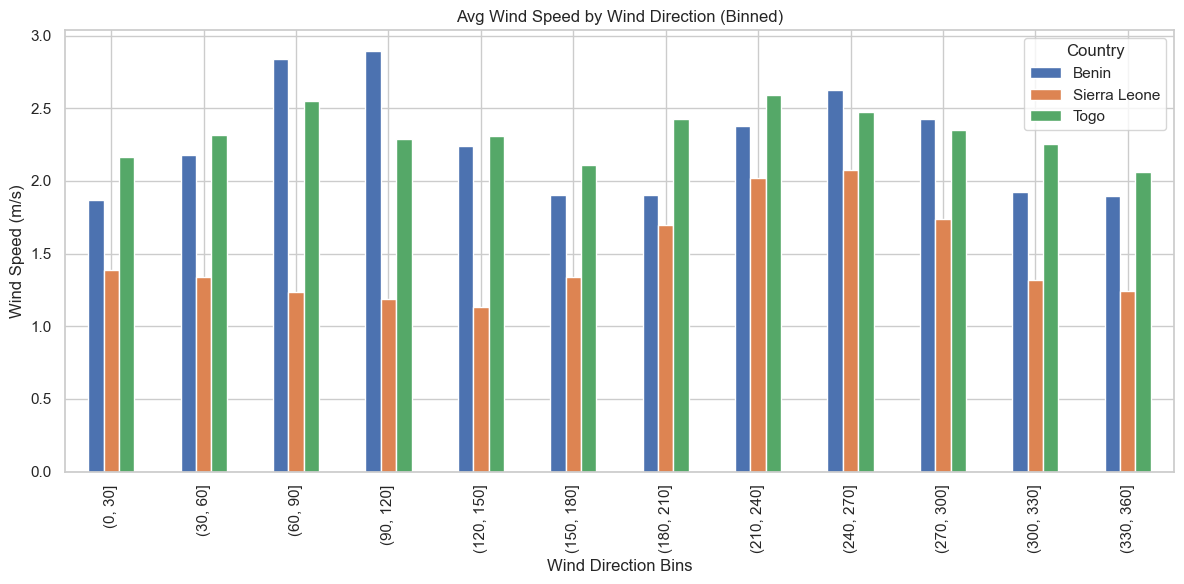

In [57]:
## Wind Rose Approx for wind darection is the polar bar is used 
plt.figure(figsize=(6, 6))
dfs['WD_bin'] = pd.cut(dfs['WD'], bins=np.arange(0, 361, 30))
wind_dir = dfs.groupby(['WD_bin', 'Country'])['WS'].mean().unstack()
wind_dir.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title("Avg Wind Speed by Wind Direction (Binned)")
plt.xlabel("Wind Direction Bins")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()
plt.show()

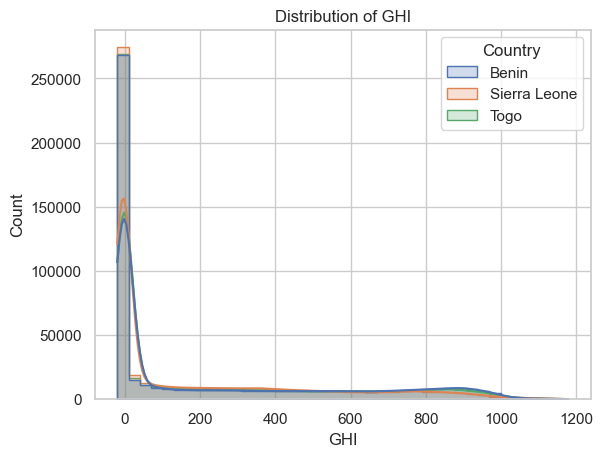

In [60]:
#histogram
sns.histplot(data=dfs, x='GHI', hue='Country', kde=True, element='step', bins=40)
plt.title("Distribution of GHI")
plt.show()

C:\Users\27638\AppData\Local\Temp\ipykernel_26428\644814662.py:5: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\27638\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


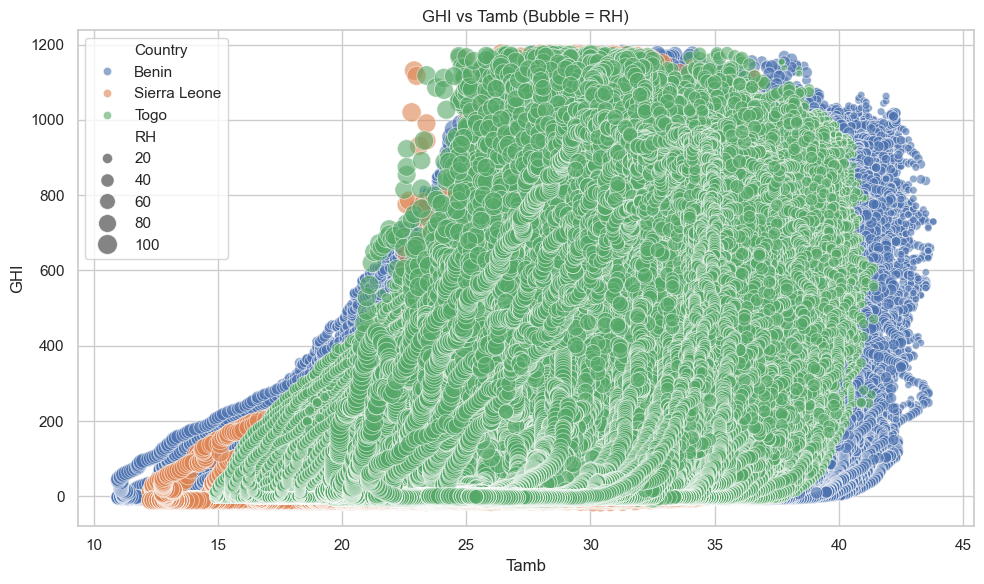

In [62]:
#bubble chart rh size 
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfs, x='Tamb', y='GHI', size='RH', hue='Country', alpha=0.6, sizes=(20, 200))
plt.title("GHI vs Tamb (Bubble = RH)")
plt.tight_layout()
plt.show()

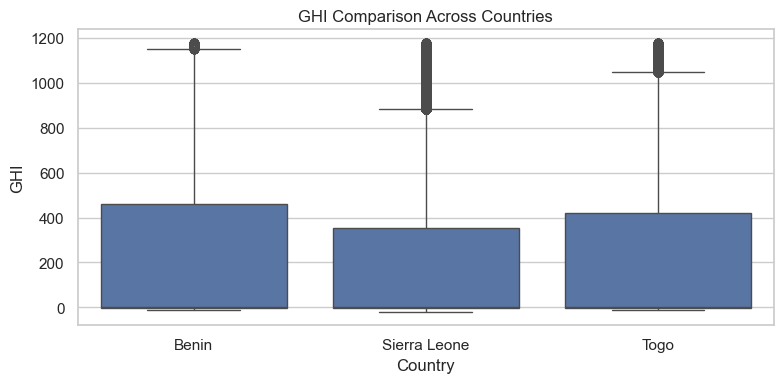

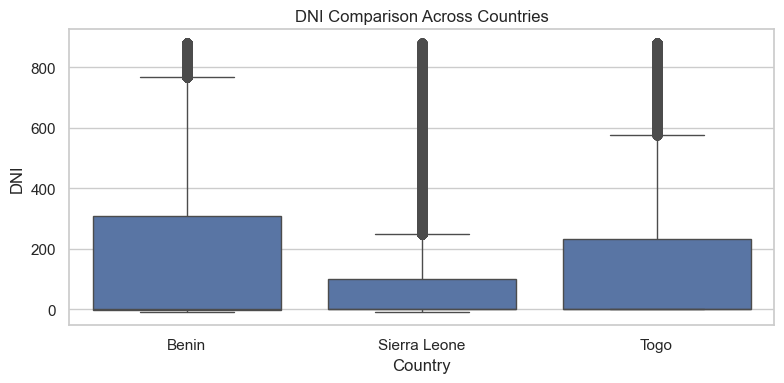

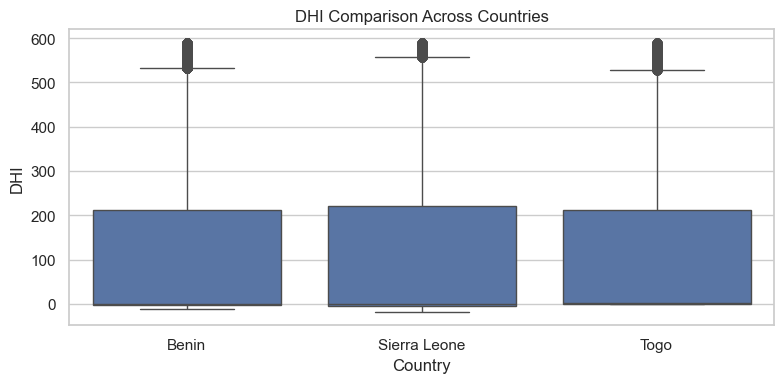

In [64]:
## box plot for cross country 
for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Country', y=metric, data=dfs)
    plt.title(f'{metric} Comparison Across Countries')
    plt.tight_layout()
    plt.show()

In [66]:
 ## Summary of Table
summary = dfs.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
print("\nSummary Table (Mean, Median, Std):")
print(summary)


Summary Table (Mean, Median, Std):
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         232.652973    0.1  325.615614  163.588732   -0.2  258.519885   
Sierra Leone  196.143419   -0.1  291.770503  114.351706   -0.1  216.176865   
Togo          221.936090    0.2  315.811258  145.878441    0.0  245.142082   

                     DHI                     
                    mean median         std  
Country                                      
Benin         110.933741    0.0  152.877009  
Sierra Leone  110.134672   -0.5  153.853287  
Togo          112.575773    1.3  151.833044  


In [68]:
### ANOVA Test to see the comparisons
f_val, p_val = stats.f_oneway(
    dfs[dfs['Country'] == 'Benin']['GHI'],
    dfs[dfs['Country'] == 'Sierra Leone']['GHI'],
    dfs[dfs['Country'] == 'Togo']['GHI']
)
print(f"\nANOVA Test on GHI across countries: F={f_val:.3f}, P={p_val:.3e}")


ANOVA Test on GHI across countries: F=1881.026, P=0.000e+00


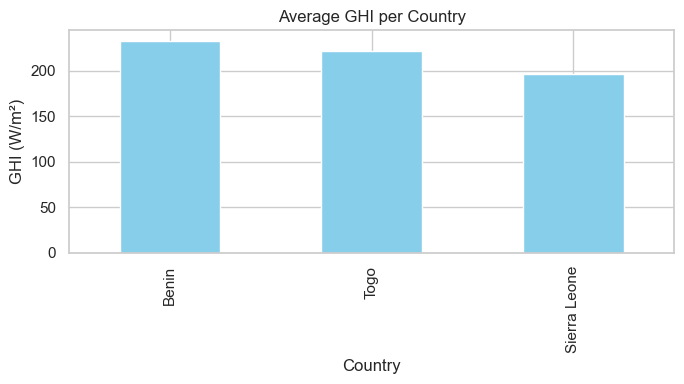

In [70]:
## Visual Summary avg ghi per countries
avg_ghi = dfs.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', title='Average GHI per Country', ylabel='GHI (W/m²)', color='skyblue', figsize=(7,4))
plt.tight_layout()
plt.show()